<a href="https://colab.research.google.com/github/kimleone/Competi-o-Kaggle/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Titanic

In [2]:
import pandas as pd
import numpy as np

In [90]:
url1 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv'

titanic = pd.read_csv(url1)
teste = pd.read_csv(url2)

In [91]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explorando os dados

###Análise rápida

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
ae = sweetviz.compare_intra(titanic, titanic['Survived'] == 0, ['Vítima','Sobrevivente'])
ae.show_html()

###Análise exploratória dos dados

In [92]:
#Pré-processamento básico:

#lista dos datasets que iremos modificar
datasets = [titanic,teste]

#dropando  as variáveis de interesse em cada conjunto de dados
for dataset in datasets:
  dataset.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1 , inplace = True)

In [93]:
titanic.rename(columns = {'Survived': 'Sobreviventes'}, inplace = True)
titanic.rename(columns = {'Pclass': 'Classe'}, inplace = True)
titanic.rename(columns = {'Age':'Idade'}, inplace = True)
titanic.rename(columns = {'SibSp': 'Familia'}, inplace = True)
titanic.rename(columns = {'Parch' : 'Parentes'}, inplace = True)
titanic.rename(columns = {'Fare': 'Tarifa'}, inplace = True)
titanic.rename(columns = {'Sex': 'Sexo'}, inplace = True)
titanic.rename(columns = {'Embarked': 'Embarque'}, inplace = True)


titanic.head()

,Sobreviventes,Classe,Sexo,Idade,Familia,Parentes,Tarifa,Embarque
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [94]:
teste.rename(columns = {'Pclass': 'Classe'}, inplace = True)
teste.rename(columns = {'Age':'Idade'}, inplace = True)
teste.rename(columns = {'SibSp': 'Familia'}, inplace = True)
teste.rename(columns = {'Parch' : 'Parentes'}, inplace = True)
teste.rename(columns = {'Fare': 'Tarifa'}, inplace = True)
teste.rename(columns = {'Sex': 'Sexo'}, inplace = True)
teste.rename(columns = {'Embarked': 'Embarque'}, inplace = True)


teste.head()

,Classe,Sexo,Idade,Familia,Parentes,Tarifa,Embarque
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sobreviventes  891 non-null    int64  
 1   Classe         891 non-null    int64  
 2   Sexo           891 non-null    object 
 3   Idade          714 non-null    float64
 4   Familia        891 non-null    int64  
 5   Parentes       891 non-null    int64  
 6   Tarifa         891 non-null    float64
 7   Embarque       889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Classe    418 non-null    int64  
 1   Sexo      418 non-null    object 
 2   Idade     332 non-null    float64
 3   Familia   418 non-null    int64  
 4   Parentes  418 non-null    int64  
 5   Tarifa    417 non-null    float64
 6   Embarque  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [10]:
titanic.corr()

,Sobreviventes,Classe,Idade,Familia,Parentes,Tarifa
Sobreviventes,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Idade,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
Familia,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parentes,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Tarifa,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
titanic[['Classe','Idade','Tarifa']].groupby([titanic['Sobreviventes'], titanic['Sexo']]).describe().round(2)

In [30]:
titanic['Tarifa'].groupby([titanic['Sobreviventes'], titanic['Sexo']]).describe()

count       mean        std  ...       50%      75%       max
Sobreviventes Sexo                                 ...                             
0             female   81.0  23.024385  24.821287  ...  15.24580  27.9000  151.5500
              male    468.0  21.960993  32.409799  ...   9.41665  26.0000  263.0000
1             female  233.0  51.938573  64.102256  ...  26.00000  76.2917  512.3292
              male    109.0  40.821484  71.355967  ...  26.28750  39.0000  512.3292

[4 rows x 8 columns]

In [99]:
titanic[titanic['Tarifa'] == 0].describe()

,Sobreviventes,Classe,Idade,Familia,Parentes,Tarifa
count,15.000000,15.000000,7.000000,15.0,15.0,15.0
mean,0.066667,1.933333,35.142857,0.0,0.0,0.0
std,0.258199,0.798809,10.023781,0.0,0.0,0.0
min,0.000000,1.000000,19.000000,0.0,0.0,0.0
25%,0.000000,1.000000,30.500000,0.0,0.0,0.0
50%,0.000000,2.000000,38.000000,0.0,0.0,0.0
75%,0.000000,2.500000,39.500000,0.0,0.0,0.0
max,1.000000,3.000000,49.000000,0.0,0.0,0.0


In [13]:
titanic.isnull().mean()

Sobreviventes    0.000000
Classe           0.000000
Sexo             0.000000
Idade            0.198653
Familia          0.000000
Parentes         0.000000
Tarifa           0.000000
Embarque         0.002245
dtype: float64

In [14]:
teste.isnull().mean()

Classe      0.000000
Sexo        0.000000
Idade       0.205742
Familia     0.000000
Parentes    0.000000
Tarifa      0.002392
Embarque    0.000000
dtype: float64

In [15]:
eda = titanic.dropna()
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sobreviventes  712 non-null    int64  
 1   Classe         712 non-null    int64  
 2   Sexo           712 non-null    object 
 3   Idade          712 non-null    float64
 4   Familia        712 non-null    int64  
 5   Parentes       712 non-null    int64  
 6   Tarifa         712 non-null    float64
 7   Embarque       712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


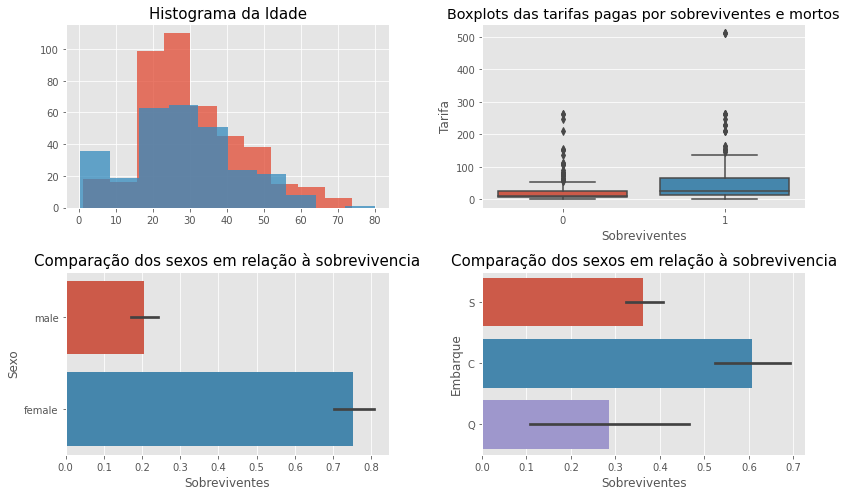

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.figure(figsize=(12,7))

plt.subplot(2,2,1)
plt.hist(eda[ eda['Sobreviventes'] == 0 ]['Idade'], alpha = .75)
plt.hist(eda[eda['Sobreviventes'] == 1]['Idade'], alpha = .75)
plt.title('Histograma da Idade', size = 15)


plt.subplot(2,2,2)
sns.boxplot(x = 'Sobreviventes', y = 'Tarifa', data = eda)
plt.title('Boxplots das tarifas pagas por sobreviventes e mortos')

plt.subplot(2,2,3)
sns.barplot(x = 'Sobreviventes', y = 'Sexo', data = eda)
plt.title('Comparação dos sexos em relação à sobrevivencia', size = 15)

plt.subplot(2,2,4)
sns.barplot(x = 'Sobreviventes', y = 'Embarque', data = eda)
plt.title('Comparação dos sexos em relação à sobrevivencia', size = 15)

plt.tight_layout()
plt.show() 

### Algumas observações:
*   As variáveis idade e embarque possuem alguns valores faltantes no conjunto de treino. No conjunto de teste também há valores faltantes na variável tarifa; 
*   As variáveis classe e tarifa possuem as maiores correlações com a variável Sobreviventes;
*   Metade dos passageiros tinham mais de 28 anos (com um desvio padrão de 14,5 anos)
*   Metade dos passageiros pagaram mais de 14,45 (com um desvio padrão de 49,70)
*   É interessante notar que existem 15 pessoas na base de dados que não pagaram tarifa, todos homens. Deles quatro eram da classe 3, e o único sobrevivente é dessa classe.
*   De 890 passageiros no conjunto de treino temos apenas 360 sobreviventes 
*   A distribuição dos mortos está mais concentrada nos passageiros cuja tarifa está abaixo de 100. Ao compararmos vemos q os sobreviventes tendem a pagar mais.
*   Apenas 20,53% dos homens sobreviveram. Por outro lado, 75,29% das mulheres sobreviveram
*   60,77% dos que embarcaram na estação C sobreviveram. Apenas 28,57% dos que embarcaram na Q sobreviveram e a S tem 36% de sobreviventes.


##Pre-processamento dos dados

###Lidando com os dados faltantes

In [ ]:
import missingno as msno
msno.matrix(titanic);

In [ ]:
msno.matrix(teste)

In [63]:
moda_emb = titanic['Embarque'].mode()[0]

for dataset in datasets:
  dataset['Embarque'] = dataset['Embarque'].fillna(moda_emb)



####Usando o knn para preencher valores missing das variáveis contínuas

In [64]:
#Treino
df_numeric = titanic.select_dtypes(include = [np.float])
from fancyimpute import KNN

imputer = KNN(9)

df_filled = pd.DataFrame(imputer.fit_transform(df_numeric))
df_filled.columns = df_numeric.columns
df_filled.index = df_numeric.index

#Teste
df_numeric2 = teste.select_dtypes(include = [np.float])

df_filled2 = pd.DataFrame(imputer.fit_transform(df_numeric2))
df_filled2.columns = df_numeric2.columns
df_filled2.index = df_numeric2.index


Imputing row 1/891 with 0 missing, elapsed time: 0.104
Imputing row 101/891 with 0 missing, elapsed time: 0.105
Imputing row 201/891 with 0 missing, elapsed time: 0.106
Imputing row 301/891 with 1 missing, elapsed time: 0.107
Imputing row 401/891 with 0 missing, elapsed time: 0.108
Imputing row 501/891 with 0 missing, elapsed time: 0.109
Imputing row 601/891 with 0 missing, elapsed time: 0.111
Imputing row 701/891 with 0 missing, elapsed time: 0.111
Imputing row 801/891 with 0 missing, elapsed time: 0.112
Imputing row 1/418 with 0 missing, elapsed time: 0.033
Imputing row 101/418 with 0 missing, elapsed time: 0.034
Imputing row 201/418 with 1 missing, elapsed time: 0.036
Imputing row 301/418 with 0 missing, elapsed time: 0.038
Imputing row 401/418 with 0 missing, elapsed time: 0.039


In [65]:
titanic['Idade'] = df_filled['Idade']
titanic['Tarifa'] = df_filled['Tarifa']
teste['Idade'] = df_filled2['Idade']
teste['Tarifa'] = df_filled2['Tarifa']

### Trocando a variavel sexo por valores binários

In [66]:
for dataset in datasets:
  dataset['Sexo'] = dataset['Sexo'].map({'male':0, 'female': 1})

titanic.head()

,Sobreviventes,Classe,Sexo,Idade,Familia,Parentes,Tarifa,Embarque
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


###Dummyficação da variável Embarque

In [67]:
titanic = pd.get_dummies(titanic, columns = ['Embarque'], drop_first = True)
teste = pd.get_dummies(teste, columns = ['Embarque'], drop_first = True)

In [68]:
titanic.head()

,Sobreviventes,Classe,Sexo,Idade,Familia,Parentes,Tarifa,Embarque_Q,Embarque_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


###Padronizando variáveis contínuas

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [70]:
aux0 = sc.fit_transform(titanic[['Idade','Tarifa']])
aux1 = pd.DataFrame(aux0, columns = ['NIdade', 'NTarifa'])
titanic = pd.concat([titanic, aux1], axis = 1)
titanic.drop(['Idade', 'Tarifa'], axis = 1, inplace = True)

In [71]:
aux0 = sc.fit_transform(teste[['Idade', 'Tarifa']])
aux1 = pd.DataFrame(aux0, columns = ['NIdade', 'NTarifa'])
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Idade', 'Tarifa'], axis = 1, inplace = True)

In [72]:
titanic.head()

,Sobreviventes,Classe,Sexo,Familia,Parentes,Embarque_Q,Embarque_S,NIdade,NTarifa
0,0,3,0,1,0,0,1,-0.587368,-0.502445
1,1,1,1,1,0,0,0,0.597733,0.786845
2,1,3,1,0,0,0,1,-0.291093,-0.488854
3,1,1,1,1,0,0,1,0.375526,0.420730
4,0,3,0,0,0,0,1,0.375526,-0.486337


##Modelos

In [73]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [74]:
#Separando variável explicativa e variável resposta do treinamento

X = titanic.drop('Sobreviventes', axis = 1)
Y = titanic['Sobreviventes']

In [75]:
#Validação cruzada Leave One Out
kf = KFold(n_splits = 20, shuffle = True)

###Random Forest

In [76]:
#Encontrando o melhor valor do 'max_depth' através de validação cruzada K-FOLD Leave-One-Out

from sklearn.model_selection import GridSearchCV

valores = np.arange(2,21,2)
parametros = {'max_depth': valores}

clf = GridSearchCV(RandomForestClassifier(), param_grid = parametros, cv = kf, scoring = 'accuracy')
clf.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_s

In [77]:
#melhor 'max_depth'
clf.best_params_

{'max_depth': 8}

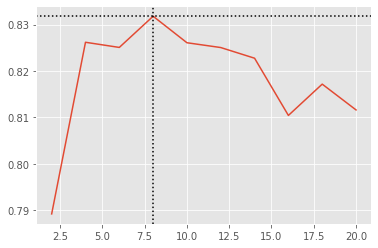

In [78]:
# gráfico de todos as acurácias obtidas no GridSearch

import matplotlib.pyplot as plt

accs = clf.cv_results_['mean_test_score']
melhor = clf.best_params_.get('max_depth')

plt.plot(valores, accs)
plt.axhline(max(accs), color = 'black', linestyle = 'dotted')
plt.axvline(melhor, color = 'black', linestyle = 'dotted')
plt.show()

In [79]:
#verificando a performance

modelo = RandomForestClassifier(max_depth = 8)
accs_vc = cross_val_score(modelo, X, Y, cv = 10, scoring = 'accuracy')
 
print('Acurácia do Random Forest: {:.2f}%'.format(100*accs_vc.mean()))

Acurácia do Random Forest: 83.28%


###Curva Roc

In [84]:
#Curva Roc

A = titanic[['Embarque_Q', 'Embarque_S','NIdade','NTarifa','Parentes','Familia','Sexo','Classe']]
B = titanic[['Sobreviventes']]

from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.30, stratify = titanic['Sobreviventes'], random_state=24)

A_train.shape

(623, 8)

In [85]:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
A_train_scaled = mmScaler.fit_transform(A_train.values)
A_test_scaled = mmScaler.fit_transform(A_test.values)

A_train = pd.DataFrame(A_train_scaled, index=A_train.index, columns=A_train.columns)
A_test = pd.DataFrame(A_test_scaled, index=A_test.index, columns=A_test.columns)

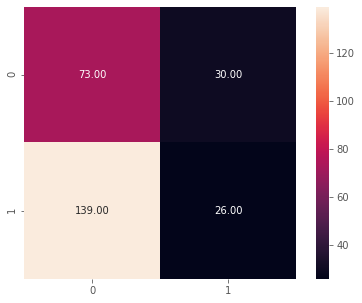

In [86]:
B_test_pred = modelo.predict(A_test)

#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(B_test, B_test_pred, labels=[1, 0])
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, square=True, fmt = ".2f")
plt.show()

In [87]:
TP = cm[1,1] # True Positive
FN = cm[0,0] # False Negative
FP = cm[0,1] # False Positive
TN = cm[1,0] # True Negative

from sklearn.metrics import roc_auc_score

precision = TP/(TP+FP)
recall = TP/(TP+FN)
sensitivity = TP/(TP+FN)
specificity = TN / (TN + FP)
#Receiver Operator Characteristic Curve 
roc_auc_score(B_test, B_test_pred)

0.43315681082671376

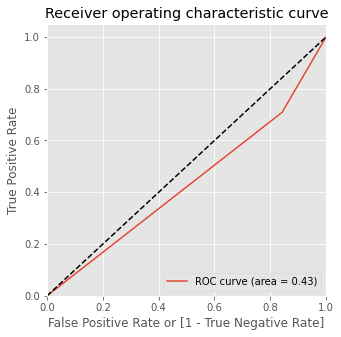

In [88]:
# Defining the function to plot the ROC curve
from sklearn.metrics import roc_auc_score , roc_curve

def draw_roc(B_test, B_test_pred ):
    fpr, tpr, thresholds = roc_curve( B_test, B_test_pred,
                                              drop_intermediate = False )
    auc_score = roc_auc_score(B_test, B_test_pred)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(B_test, B_test_pred)
  

##Preparando o csv pa submeter o modelo ao Kaggle

In [80]:
modelo.fit(X,Y)
pred = modelo.predict(teste)

url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
subm = pd.read_csv(url, usecols = ['PassengerId'] )  
subm['Survived'] = pred

subm.to_csv('A_submissao.csv', index = False)